## set up

In [2]:
# !ls ../data/csv

In [3]:
!pip install wordcloud



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [5]:
file_path = '../data/csv/top100_source.csv'
source_df = pd.read_csv(file_path)
source_df.head()

,source,frequency,total_score
0,Reuters,319453,327004
1,rajacreator,68753,68753
2,AP,63886,67112
3,bluzz,57339,57337
4,reuters,39747,34230489


In [6]:
def normalize_source_name(source):
    source = source.lower()
    if source in ['reuters', 'reuter']:
        return 'reuters'
    elif source in ['youtu', 'youtube']:
        return 'youtube'
    else:
        return source

# Normalize source names in the DataFrame
source_df['source'] = source_df['source'].apply(normalize_source_name)
source_df = source_df.groupby('source').agg({'frequency': 'sum', 'total_score': 'sum'}).reset_index()
source_df = source_df.sort_values(by='frequency', ascending=False).reset_index(drop = True)
source_df.head()

,source,frequency,total_score
0,reuters,359200,34557493
1,rajacreator,68753,68753
2,ap,63886,67112
3,youtube,57483,57338
4,bluzz,57339,57337


## create word cloud


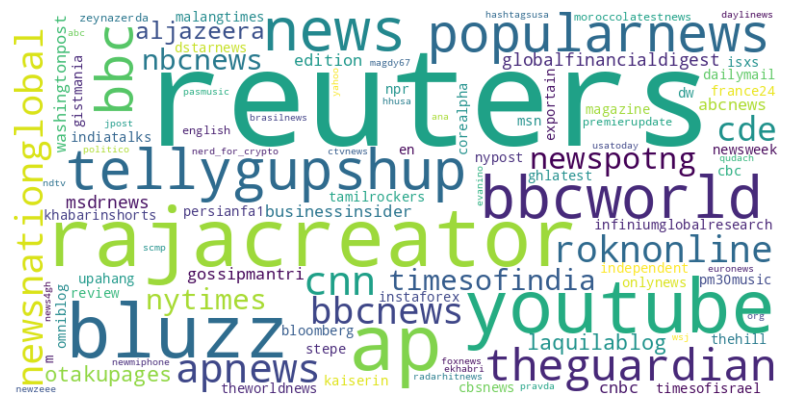

In [8]:
def generate_word_cloud(data, column, file_name):
    # Create a text string for the word cloud
    text = ''.join([(str(row['source']) + ' ') * int(row[column]) for index, row in data.iterrows()])
    # print(text)
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations = False,).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # Save the plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.close()

    
# Paths for saving word clouds
freq_cloud_path = '../data/plots/frequency_wordcloud.png'
score_cloud_path = '../data/plots/score_wordcloud.png'

# Generate a word cloud for 'frequency'
generate_word_cloud(source_df, 'frequency', freq_cloud_path)

# Generate a word cloud for 'total_score'
# generate_word_cloud(source_df, 'total_score', score_cloud_path)